In [0]:
## Import training_images.npz, testing_images.npz and examples.npz into the file
!wget "http://users.sussex.ac.uk/~is321/training_images.npz" -O training_images.npz
!wget "http://users.sussex.ac.uk/~is321/test_images.npz" -O test_images.npz
!wget "http://users.sussex.ac.uk/~is321/examples.npz" -O examples.npz

--2020-05-27 23:52:23--  http://users.sussex.ac.uk/~is321/training_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375302693 (358M)
Saving to: ‘training_images.npz’

training_images.npz 100%[===================>] 357.92M  8.87MB/s    in 44s     

2020-05-27 23:53:09 (8.21 MB/s) - ‘training_images.npz’ saved [375302693/375302693]

--2020-05-27 23:53:11--  http://users.sussex.ac.uk/~is321/test_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74915629 (71M)
Saving to: ‘test_images.npz’

test_images.npz     100%[===================>]  71.44M  9.06MB/s    in 12s     

2020-05-27 23:53:23 (5.95 MB/s) - ‘test_images.npz’ saved [74915629/74915629]

--2020

In [0]:
import numpy as np
from skimage.color import rgb2gray

## Pre-processing on training data for Model 1

# Load data from training_images.npz
data = np.load('training_images.npz',allow_pickle=True)

# Stores the images from data in variable to represent training images
trainImages = data['images']

# Use rgb2gray function from skimage.color library to change image to grayscale
trainImages = rgb2gray(trainImages)

# Stores the points from data into variable for training points
pts = data['points']

for i in range(2811):
    for j in range(68):
        for k in range(2):
            # Check for any coordinates out of range
            # Change any coordinates above limit to 250
            if(pts[i][j][k] > 250):
                pts[i][j][k] = 250
            # Change any coordinates below limit to 0
            if(pts[i][j][k] < 0):
                pts[i][j][k] = 0
            # Change all coordinate values to be between -1 and 1
            pts[i][j][k] = pts[i][j][k] - 125
            pts[i][j][k] = pts[i][j][k] / 125

# Set both images and points to type float32
trainImages = trainImages.astype(np.float32)        
pts = pts.astype(np.float32)

# Reshape both images and pts to suitable sizes
trainImages = trainImages.reshape(2811,62500)
pts = pts.reshape(2811, 136)

In [0]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from ipykernel import kernelapp as app

## Model 1

# Define new model using Sequential from Keras models
model = Sequential([
    # Added input layer, this layer is a Dense layer from Keras Layers
    # This is a densely connected neural network layer which has output shape of 500
    Dense(500, input_dim=trainImages.shape[1]),
    # Added an activation layer from Keras Layers
    # Applies an activation function, doesn't affect output shape
    Activation('relu'),
    # Added another Dense Layer as the output layer, this time with output shape 136
    # This is the format needed as it represents the number of coordinates of points per image (68*2)
    Dense(136),
])

# Define new Stochastic Gradient Descent which will be used for the required optimizer in compiling the model
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
# Compiles the model using a mean squared error for loss and optimizer defined above
model.compile(loss='mean_squared_error', optimizer=sgd)

Using TensorFlow backend.


In [0]:
## Train the model on the training images and points
# Sets the number of runs (epochs) and amount of data used for validation each run
model.fit(trainImages, pts, nb_epoch=250, validation_split=0.2,verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 2248 samples, validate on 563 samples
Epoch 1/250
2248/2248 [==============================] - 3s 1ms/step - loss: 0.0468 - val_loss: 0.0165
Epoch 2/250
2248/2248 [==============================] - 1s 527us/step - loss: 0.0141 - val_loss: 0.0138
Epoch 3/250
2248/2248 [==============================] - 1s 530us/step - loss: 0.0129 - val_loss: 0.0148
Epoch 4/250
2248/2248 [==============================] - 1s 540us/step - loss: 0.0123 - val_loss: 0.0137
Epoch 5/250
2248/2248 [==============================] - 1s 536us/step - loss: 0.0119 - val_loss: 0.0132
Epoch 6/250
2248/2248 [==============================] - 1s 535us/step - loss: 0.0114 - val_loss: 0.0130
Epoch 7/250
2248/2248 [==============================] - 1s 524us/step - loss: 0.0109 - val_loss: 0.0143
Epoch 8/250
2248/2248 [==============================] - 1s 527us/step - loss: 0.0106 - val_loss: 0.0117
Epoch 9/250
2248/2248 [==============================] - 1s 532us/step - loss: 0.0102 - val_loss: 0.0129
Epoch 10/2

In [0]:
# Outputs a summary of the model to show each step and the output shape
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               31250500  
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 136)               68136     
Total params: 31,318,636
Trainable params: 31,318,636
Non-trainable params: 0
_________________________________________________________________


In [0]:
## Pre-processing of testing data

# Import testing data from file
test = np.load('test_images.npz',allow_pickle=True)

# Store testing images in a variable
testImages = test['images']

# Set images to grayscale
testImages = rgb2gray(testImages)

# Set images to datatype float32
testImages = testImages.astype(np.float32)

# Reshape images to suitable size
testImages = testImages.reshape(554, 62500)

In [0]:
## Use model to predict points on testing images
predictedPts = model.predict(testImages)

In [0]:
## Function to plot a singular image with its predicted points
def plotSample(image,points,axes):
  
    # Reshapes image to correct size and sets image type to grayscale
    axes.imshow(image.reshape(250,250),cmap="gray")

    # Sets the predicted points on screen
    # Changes values back from -1 to 1 to be between 0 and 250
    axes.scatter(125*points[0::2]+ 125,125*points[1::2]+ 125)

In [0]:
import matplotlib.pyplot as plt

## Function to plot a sequence of three sequential images
# Starting point is defined in parameter
def plotImages(start):

  # Sets up the features of each figure
  fig = plt.figure(figsize=(12, 12))
  fig.subplots_adjust(hspace=0.10,wspace=0.0001,
                    left=0,right=1,bottom=0, top=1)

  # j represents the position in the plotted structure for a given image
  j = 1

  # Loops from the passed position and the two sequential positions in testing images
  for i in range(start,start+3):

    # Sets up a new subplot for next image, in position j
    ax = fig.add_subplot(3 , 3, j,xticks=[],yticks=[])  

    # Calls plotSample to plot image in position i into the subplot      
    plotSample(testImages[i],predictedPts[i],ax)

    # Increment j
    j += 1

  # Display figures
  plt.show()

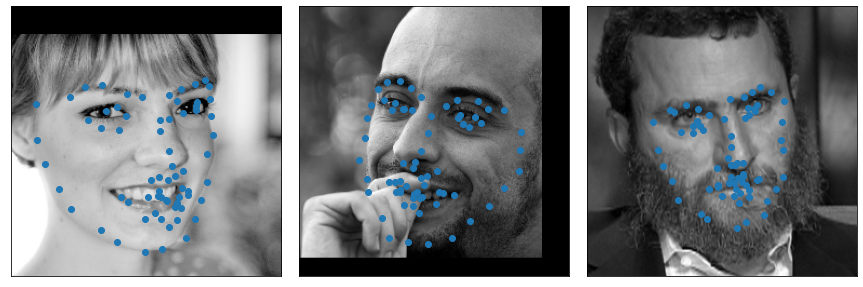

In [0]:
## Call to plotImages to display 3 images with prediced points
plotImages(376)

In [0]:
## Pre-processing of example images
# Load data from file
example = np.load('examples.npz',allow_pickle=True)

# Extract images from data
exampleImages = example['images']

# Change images to grayscale
exampleImages = rgb2gray(exampleImages)

# Reshape image for use in model
exampleImages = exampleImages.reshape(-1,62500)

# Use model to predict points on example images
predictedPts2 = model.predict(exampleImages)

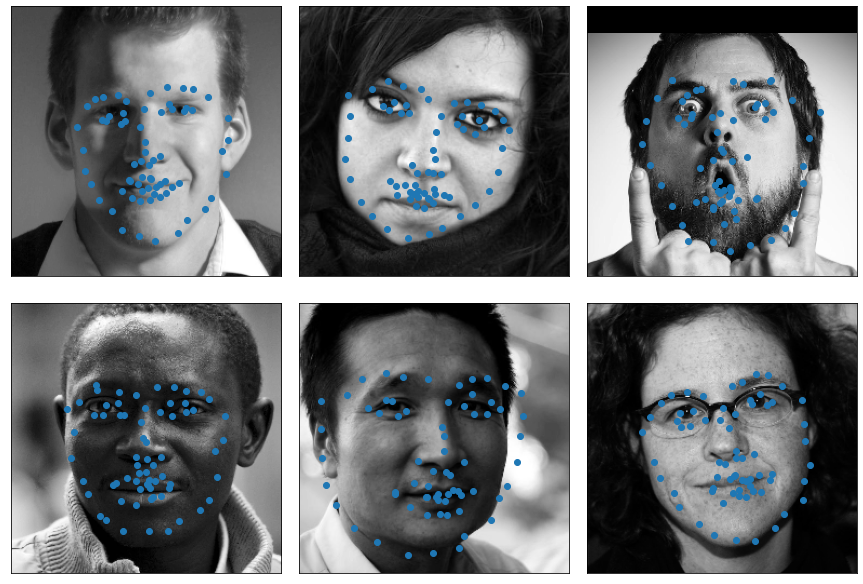

In [0]:
# Sets up the features of each figure
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0.10,wspace=0.0001,
                    left=0,right=1,bottom=0, top=1)

# j represents the position in the plotted structure for a given image
j = 1

# Loops from the passed position and the two sequential positions in testing images
for i in range(6):

    # Sets up a new subplot for next image, in position j
    ax = fig.add_subplot(3 , 3, j,xticks=[],yticks=[])  

    # Calls plotSample to plot image in position i into the subplot      
    plotSample(exampleImages[i],predictedPts2[i],ax)

    # Increment j
    j += 1

# Display figures
plt.show()

In [0]:
## Function to calculate euclidean distance between predicted and real points
def euclid_dist(pred_pts, gt_pts):
  """
  Calculate the euclidean distance between pairs of points
  :param pred_pts: The predicted points
  :param gt_pts: The ground truth points
  :return: An array of shape (no_points,) containing the distance of each predicted point from the ground truth
  """
  import numpy as np
  pred_pts = np.reshape(pred_pts, (-1, 2))
  gt_pts = np.reshape(gt_pts, (-1, 2))
  return np.sqrt(np.sum(np.square(pred_pts - gt_pts), axis=-1))

In [0]:
## Calculate euclidean distance between predictions and real points on training images

# Use model to predict points on training images
predictedPoints = model.predict(trainImages)

# Copy real points into new variable
basePoints = pts.copy()

# Reshape points to be in suitable format for comparison (between 0 and 250)
predictedPoints = predictedPoints * 125
predictedPoints = predictedPoints + 125
basePoints = basePoints * 125
basePoints = basePoints + 125

# Calculate the mean of all distances
np.mean(euclid_dist(predictedPoints,basePoints))

6.5810614